<a href="https://colab.research.google.com/github/durgatmc/DataInsights/blob/main/Pima_Decision_tree_%26_Random_forest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/durgatmc/DataInsights.git

Cloning into 'DataInsights'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 12), reused 9 (delta 2), pack-reused 0
Receiving objects: 100% (43/43), 546.00 KiB | 2.12 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization

# Loading the dataset
from pandas import read_csv
data = pd.read_csv("/content/DataInsights/pima-indians-diabetes.csv")  # Load the dataset from the specified path

# Display the first few rows of the data frame to inspect the data
data.head()  # Display the first five rows of the DataFrame

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


  Preprocessing of data

In [4]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Replacing median in NaN values

In [5]:
import numpy as np
import pandas as pd

# Assuming 'df' is your pandas DataFrame
data[['Preg', 'Plas', 'Pres', 'skin', 'test',
    'mass', 'pedi', 'age']] = data[['Preg', 'Plas', 'Pres', 'skin', 'test',
    'mass', 'pedi', 'age']].replace(0, np.NaN)


from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming data is your DataFrame with missing values
# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on your data to compute median values for each column
imputer.fit(data)

# Transform the data to replace missing values with median values
data = pd.DataFrame(imputer.transform(data), columns=data.columns)



In [6]:
#Define the columns to cap outliers
columns_to_cap = ['Preg', 'Pres', 'skin', 'test', 'pedi', 'age']

# Define the cap values for each column
cap_values = [10.00, (44.00, 106.00), 51.33, 519.90, 1.00, 67.00]

# Cap outliers for each column using list comprehension
for col, cap_value in zip(columns_to_cap, cap_values):
    if isinstance(cap_value, tuple):
        lower_cap, upper_cap = cap_value
        data[col] = np.where(data[col] < lower_cap, lower_cap, data[col])
        data[col] = np.where(data[col] > upper_cap, upper_cap, data[col])
    else:
        data[col] = np.where(data[col] > cap_value, cap_value, data[col])


<Axes: xlabel='class', ylabel='age'>

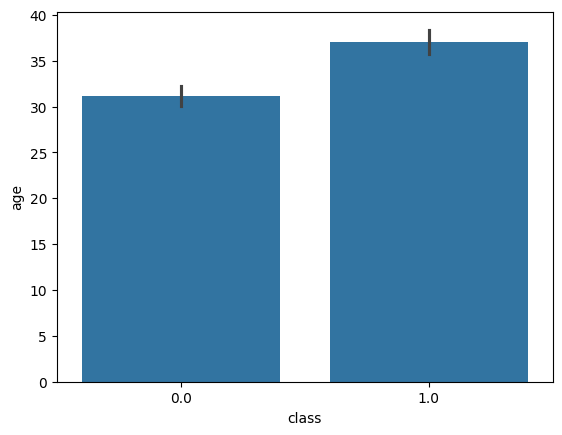

In [7]:
# Create a bar plot
sns.barplot(x='class', y='age', data=data, estimator=np.mean)

Checking Correlation

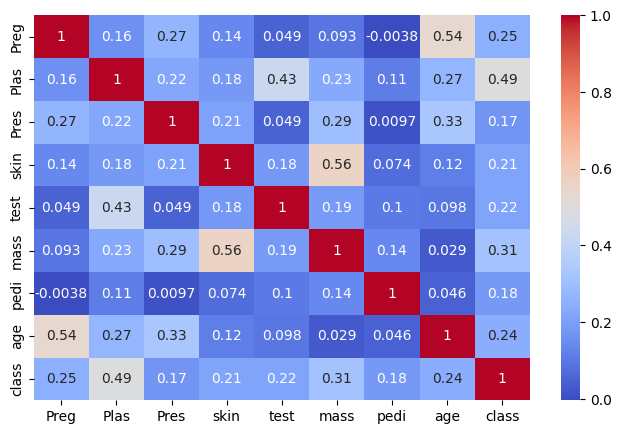

In [8]:
# Compute the correlation matrix
cor = data.corr()

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=[8, 5])

# Create a heatmap with correlation values annotated
sns.heatmap(cor, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Decision Tree Classifier

In [10]:
# Assigning the target variable 'class' to 'y'
y = data['class']

# Assigning the features (all columns except 'class') to 'x'
x = data.drop(['class'], axis=1)

# Importing necessary modules from scikit-learn
import sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Importing matplotlib for plotting
from matplotlib import pyplot as plt

# Importing train_test_split function for splitting the data
from sklearn.model_selection import train_test_split

# Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 62)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# Creating a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=62)

# Fitting the classifier to the training data
dtc.fit(x_train, y_train)

# Printing the training score
print(f'Training score : {dtc.score(x_train, y_train)}')

# Printing the testing score
print(f'Testing score : {dtc.score(x_test, y_test)}')

Training score : 1.0
Testing score : 0.6822916666666666


Hyperparameter tuning for a decision tree classifier using GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
params = {
    "criterion": ["gini", "entropy"],  # Splitting criterion
    "max_depth": [6, 8, 10],  # Maximum depth of the tree
    "min_samples_split": [10, 50, 100],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [70, 80, 90, 100, 110]  # Minimum number of samples required to be at a leaf node
}

# Initialize a base DecisionTreeClassifier
dtc_cv = DecisionTreeClassifier()

# Initialize GridSearchCV with the estimator, parameter grid, cross-validation, and scoring metric
Gsearch_dt = GridSearchCV(estimator=dtc_cv, param_grid=params, cv=10, n_jobs=-1, verbose=1, scoring="accuracy")

# Fit GridSearchCV to find the best hyperparameters
Gsearch_dt.fit(x_train, y_train)

# Print the best cross-validated score and best hyperparameters found by GridSearchCV
print("Best Cross-Validated Score:", Gsearch_dt.best_score_)
print("Best Hyperparameters:", Gsearch_dt.best_params_)

# Instantiate a DecisionTreeClassifier with the best hyperparameters found by GridSearchCV
dtc1 = DecisionTreeClassifier(criterion=Gsearch_dt.best_params_['criterion'],
                               max_depth=Gsearch_dt.best_params_['max_depth'],
                               min_samples_split=Gsearch_dt.best_params_['min_samples_split'],
                               min_samples_leaf=Gsearch_dt.best_params_['min_samples_leaf'])

# Train the decision tree model with the training data
dtc1.fit(x_train, y_train)

# Evaluate the trained model on the training and testing datasets
print("Training Score with Tuned Model:", dtc1.score(x_train, y_train))
print("Testing Score with Tuned Model:", dtc1.score(x_test, y_test))


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best Cross-Validated Score: 0.7466424682395644
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 100, 'min_samples_split': 10}
Training Score with Tuned Model: 0.7534722222222222
Testing Score with Tuned Model: 0.734375


Model Evaluation

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       380
         1.0       0.71      0.46      0.56       196

    accuracy                           0.75       576
   macro avg       0.74      0.68      0.69       576
weighted avg       0.75      0.75      0.74       576

Confusion Matrix for Training Set:
[[344  36]
 [106  90]]


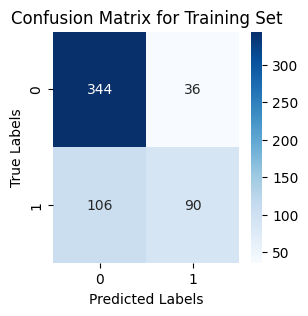

Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       120
         1.0       0.74      0.44      0.56        72

    accuracy                           0.73       192
   macro avg       0.74      0.68      0.68       192
weighted avg       0.74      0.73      0.72       192

Confusion Matrix for Testing Set:
[[109  11]
 [ 40  32]]


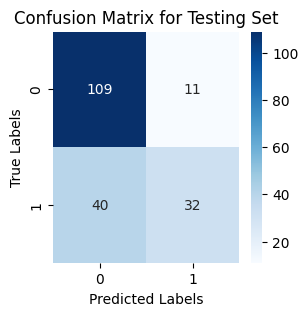

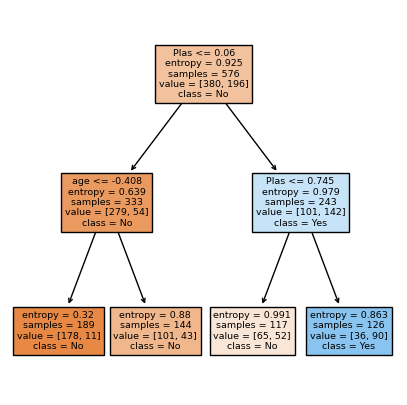

In [44]:
# 1. Evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Making predictions on the training set
pred_train = dtc1.predict(x_train)

# Make predictions on the test set
y_pred = dtc1.predict(x_test)

# Print classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, pred_train))

# Print confusion matrix for the training set
print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, pred_train))

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for the training set
plot_confusion_matrix(y_train, pred_train, title='Confusion Matrix for Training Set')

# Print classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_pred))

# Print confusion matrix for the testing set
print("Confusion Matrix for Testing Set:")
print(confusion_matrix(y_test, y_pred))

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for the testing set
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix for Testing Set')


# 3. Visualize the decision tree (if depth is manageable)
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(dtc1, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


  Feature  Importance
1    Plas    0.787107
7     age    0.212893
0    Preg    0.000000
2    Pres    0.000000
3    skin    0.000000
4    test    0.000000
5    mass    0.000000
6    pedi    0.000000


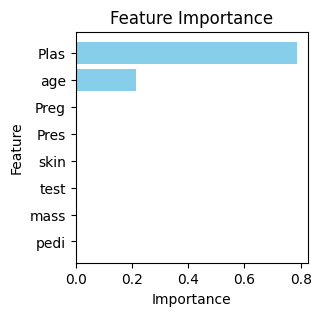

In [45]:
# 4. Feature importance analysis
importance = dtc1.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(3,3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

The DataFrame is then sorted in descending order based on the feature importances. This allows for a clear view of the importance of each feature in the decision-making process of the model.

In [17]:
models_report=pd.DataFrame()
from sklearn import metrics
tmp1 = pd.Series({'Model': " Decision Tree ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})

model_dt_report = pd.concat([models_report, tmp1])
model_dt_report

,0
Model,Decision Tree
ROC Score,0.676389
Precision Score,0.744186
Recall Score,0.444444
Accuracy Score,0.734375


Random Forest

In [18]:
# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier instance
rfc = RandomForestClassifier(random_state=62)


# Fitting the RandomForestClassifier to the training data
rfc.fit(x_train, y_train)

# Printing the training and testing scores
print(f'Training score : {rfc.score(x_train, y_train)}')
print(f'Testing score : {rfc.score(x_test, y_test)}')


Training score : 1.0
Testing score : 0.7708333333333334


In [19]:
# Importing GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for GridSearchCV
param_dist = {'max_depth': [7, 10],
              'min_samples_split': [6, 10],
              'n_estimators': [150, 200],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}

# Creating a RandomForestClassifier instance for GridSearchCV
fit_rf = RandomForestClassifier(random_state=62)

# Creating a GridSearchCV instance
cv_rf = GridSearchCV(fit_rf, cv=5, param_grid=param_dist, n_jobs=-1, verbose=1)

# Fitting the GridSearchCV to the training data
cv_rf.fit(x_train, y_train)

# Printing the best cross-validation score and best parameters found by GridSearchCV
cv_rf.best_score_
cv_rf.best_params_

# Creating a RandomForestClassifier instance with the best hyperparameters
rf1 = RandomForestClassifier(n_estimators=cv_rf.best_params_['n_estimators'],
                              max_depth=cv_rf.best_params_['max_depth'],
                              criterion=cv_rf.best_params_["criterion"],
                              min_samples_split=cv_rf.best_params_["min_samples_split"],
                              max_features=cv_rf.best_params_["max_features"],
                              bootstrap=cv_rf.best_params_["bootstrap"])

# Fitting the RandomForestClassifier with the best hyperparameters to the training data
rf1.fit(x_train, y_train)

# Printing the training and testing accuracies of the tuned RandomForestClassifier
print("Train Accuracy :", rf1.score(x_train, y_train))
print("Test Accuracy :", rf1.score(x_test, y_test))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train Accuracy : 0.9409722222222222
Test Accuracy : 0.7760416666666666


Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       380
         1.0       0.92      0.90      0.91       196

    accuracy                           0.94       576
   macro avg       0.94      0.93      0.93       576
weighted avg       0.94      0.94      0.94       576

Confusion Matrix for Training Set:
[[365  15]
 [ 19 177]]


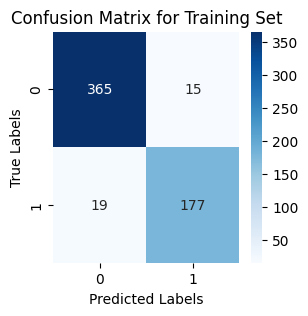

Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       120
         1.0       0.75      0.61      0.67        72

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.77      0.78      0.77       192

Confusion Matrix for Testing Set:
[[105  15]
 [ 28  44]]


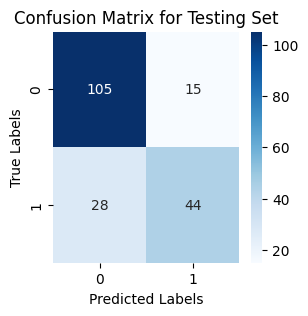

In [23]:
# Making predictions on the training set using the tuned Random Forest Classifier
pred_train_rf = rf1.predict(x_train)

# Making predictions on the testing set using the tuned Random Forest Classifier
pred_test_rf = rf1.predict(x_test)

# Printing the classification report for the training set
print("Classification Report for Training Set:")
print(metrics.classification_report(y_train, pred_train_rf))

# Printing the confusion matrix for the training set
print("Confusion Matrix for Training Set:")
print(metrics.confusion_matrix(y_train, pred_train_rf))

# Plotting the confusion matrix for the training set
plt.figure(figsize=(3, 3))
sns.heatmap(metrics.confusion_matrix(y_train, pred_train_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Printing the classification report for the testing set
print("Classification Report for Testing Set:")
print(metrics.classification_report(y_test, pred_test_rf))

# Printing the confusion matrix for the testing set
print("Confusion Matrix for Testing Set:")
print(metrics.confusion_matrix(y_test, pred_test_rf))

# Plotting the confusion matrix for the testing set
plt.figure(figsize=(3, 3))
sns.heatmap(metrics.confusion_matrix(y_test, pred_test_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix provides a breakdown of the model's predictions, distinguishing between true positives, true negatives, false positives, and false negatives. In this case:

True Negative (TN): 105 instances were correctly predicted as negative.
False Positive (FP): 15 instances were incorrectly predicted as positive.
False Negative (FN): 28 instances were incorrectly predicted as negative.
True Positive (TP): 44 instances were correctly predicted as positive.
In summary, the model's performance is evaluated based on its ability to correctly classify instances into their respective classes.

In [25]:
# 4. Feature importance analysis
importance = rf1.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

  Feature  Importance
1    Plas    0.414183
5    mass    0.154619
7     age    0.125070
6    pedi    0.088851
0    Preg    0.063015
2    Pres    0.059502
4    test    0.058473
3    skin    0.036287


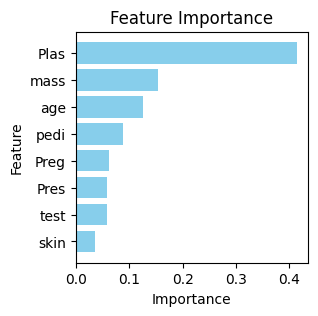

In [27]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(3,3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [28]:
models_report=pd.DataFrame()
from sklearn import metrics
tmp1 = pd.Series({'Model': "Random Forest ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test,pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf)})

model_rf_report = pd.concat([models_report, tmp1])
model_rf_report

,0
Model,Random Forest
ROC Score,0.743056
Precision Score,0.745763
Recall Score,0.611111
Accuracy Score,0.776042


XG Boost

In [29]:
# Importing XGBClassifier from xgboost
from xgboost import XGBClassifier

# Creating an XGBClassifier instance
xgb = XGBClassifier()

# Fitting the XGBClassifier to the training data
xgb.fit(x_train, y_train)

# Printing the training and testing scores
print(f'Training score : {xgb.score(x_train, y_train)}')
print(f'Testing score : {xgb.score(x_test, y_test)}')


Training score : 1.0
Testing score : 0.7916666666666666


In [30]:
# Importing GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for GridSearchCV
param_dist = {'max_depth': [7, 10],
              'min_samples_split': [6, 10],
              'n_estimators': [150, 200],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}

# Creating a XGBClassifier instance for GridSearchCV
fit_xgb = XGBClassifier(random_state=62)

# Creating a GridSearchCV instance
cv_xgb = GridSearchCV(fit_xgb, cv=10, param_grid=param_dist, n_jobs=-1, verbose=1)

# Fitting the GridSearchCV to the training data
cv_xgb.fit(x_train, y_train)

# Printing the best cross-validation score and best parameters found by GridSearchCV
cv_xgb.best_score_
cv_xgb.best_params_

# Creating a XGBClassifier instance with the best hyperparameters
xgb1 = XGBClassifier(n_estimators=cv_xgb.best_params_['n_estimators'],
                              max_depth=cv_xgb.best_params_['max_depth'],
                              criterion=cv_xgb.best_params_["criterion"],
                              min_samples_split=cv_xgb.best_params_["min_samples_split"],
                              max_features=cv_xgb.best_params_["max_features"],
                              bootstrap=cv_xgb.best_params_["bootstrap"])

# Fitting the XGBClassifier with the best hyperparameters to the training data
xgb1.fit(x_train, y_train)

# Printing the training and testing accuracies of the tuned XGBClassifier
print("Train Accuracy :", xgb1.score(x_train, y_train))
print("Test Accuracy :", xgb1.score(x_test, y_test))



Fitting 10 folds for each of 96 candidates, totalling 960 fits
Train Accuracy : 1.0
Test Accuracy : 0.7291666666666666


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:50:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       196

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Confusion Matrix for Training Set:
[[380   0]
 [  0 196]]


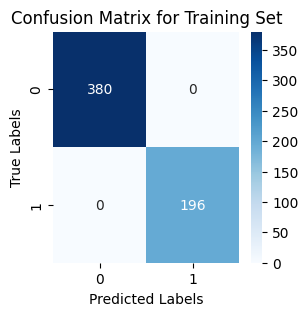

Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.80       120
         1.0       0.67      0.54      0.60        72

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192

Confusion Matrix for Testing Set:
[[101  19]
 [ 33  39]]


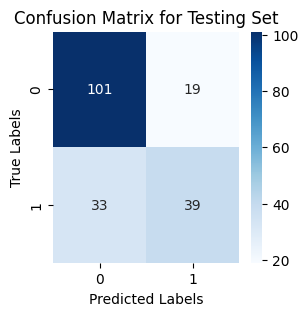

In [38]:
# Model evaluation for XGBoost classifier
from sklearn.metrics import confusion_matrix

# Making predictions on the training set using the tuned XGBoost Classifier
pred_train_xgb = xgb1.predict(x_train)

# Making predictions on the testing set using the tuned XGBoost Classifier
pred_test_xgb = xgb1.predict(x_test)

# Printing the classification report for the training set
print("Classification Report for Training Set:")
print(metrics.classification_report(y_train, pred_train_xgb))

# Printing the confusion matrix for the training set
print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, pred_train_xgb))

# Plotting the confusion matrix for the training set
plt.figure(figsize=(3, 3))
sns.heatmap(metrics.confusion_matrix(y_train, pred_train_xgb), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Printing the classification report for the testing set
print("Classification Report for Testing Set:")
print(metrics.classification_report(y_test, pred_test_xgb))

# Printing the confusion matrix for the testing set
print("Confusion Matrix for Testing Set:")
print(confusion_matrix(y_test, pred_test_xgb))
# Plotting the confusion matrix for the testing set
plt.figure(figsize=(3, 3))
sns.heatmap(metrics.confusion_matrix(y_test, pred_test_xgb), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [33]:
# 4. Feature importance analysis
importance = xgb1.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

  Feature  Importance
1    Plas    0.245287
4    test    0.143677
5    mass    0.127763
7     age    0.119684
0    Preg    0.118917
3    skin    0.085038
6    pedi    0.079912
2    Pres    0.079723


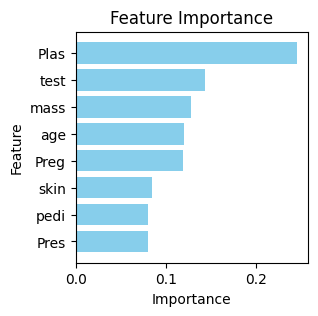

In [34]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(3, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [36]:
models_report2=pd.DataFrame()
from sklearn import metrics
tmp2 = pd.Series({'Model': "XG Boost",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_xgb),
                 'Precision Score': metrics.precision_score(y_test,pred_test_xgb),
                 'Recall Score': metrics.recall_score(y_test, pred_test_xgb),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_xgb)})

model_xgb_report = pd.concat([models_report2, tmp2])
model_xgb_report

,0
Model,XG Boost
ROC Score,0.691667
Precision Score,0.672414
Recall Score,0.541667
Accuracy Score,0.729167


In [49]:
# Define columns for the DataFrame
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score', 'Accuracy Score']

# Create DataFrames model_rf_report and model_dt_report
model = pd.concat([model_rf_report, model_dt_report, model_xgb_report], axis=0)

# Print the concatenated DataFrame
print(model)


                               0
Model             Random Forest 
ROC Score               0.743056
Precision Score         0.745763
Recall Score            0.611111
Accuracy Score          0.776042
Model             Decision Tree 
ROC Score               0.676389
Precision Score         0.744186
Recall Score            0.444444
Accuracy Score          0.734375
Model                   XG Boost
ROC Score               0.691667
Precision Score         0.672414
Recall Score            0.541667
Accuracy Score          0.729167


Summary:
Random Forest Outperforms Decision Tree and XGBoost: Random Forest achieves higher scores across all evaluation metrics compared to Decision Tree and XGBoost. This is attributed to its ensemble nature, which aggregates predictions from multiple decision trees, leading to more stable and accurate estimates.
Decision Tree Shows Weakest Performance: Decision Tree exhibits the lowest scores among the three models for all evaluation metrics, indicating its weakest performance overall. This is expected as Decision Trees tend to be prone to overfitting and lack the robustness of ensemble methods like Random Forest and XGBoost.
XGBoost Performs Better Than Decision Tree: While XGBoost lags behind Random Forest in most metrics, it still outperforms Decision Tree. XGBoost's boosting algorithm allows it to sequentially learn from mistakes, leading to better performance compared to a single Decision Tree.
Random Forest's Aggregation Mechanism: Random Forest's ability to aggregate predictions from multiple decision trees results in more stable and accurate estimates of feature importance. This is an advantage over a single Decision Tree, which may provide less reliable estimates.

Overall, Random Forest emerges as the top-performing model in this classification task, demonstrating its effectiveness compared to both Decision Tree and XGBoost. This summary effectively captures the key findings from the comparison of the three models.